# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [20]:
import math

G = 6.67*10**-11 # m^3 kg^−1 s^-2
M = 5.97*10**24 # kg
R = 6371*1000 # m
T = int(input("Enter orbital period T (in seconds): "))

def altitude(T):
    h = ((G*M*T**2)/(4*math.pi**2))**(1/3) - R
    return h
print('The altitude is', altitude(T))

Enter orbital period T (in seconds): 120
The altitude is -5845344.789733462


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [21]:
geosync = 24*60*60 # (seconds)
hourhalf = 90*60 # (seconds)
min45 = 45*60 # (seconds)
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 279321.62537285965 ;  45 min: Altitude = -2181559.8978108233


the last altitude calculation for 45 minutes is calculating an altitude that is negative which means that in order to orbit the earth that fast it would have to be that far under the surface of the earth.

Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [22]:
persidereal = 23.93*60*60 # (seconds)
print("24 hours: Altitude =",altitude(geosync), "; 23.93 hours: Altitude =",altitude(persidereal))

24 hours: Altitude = 35855910.17617497 ; 23.93 hours: Altitude = 35773762.329895645


the orbit isnt a true 24 hours so when calculating the altitude using the correct time we get a much smaller number. The rounded time of 24 hours gives us an altitude 82147.8462793 meters too much

#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

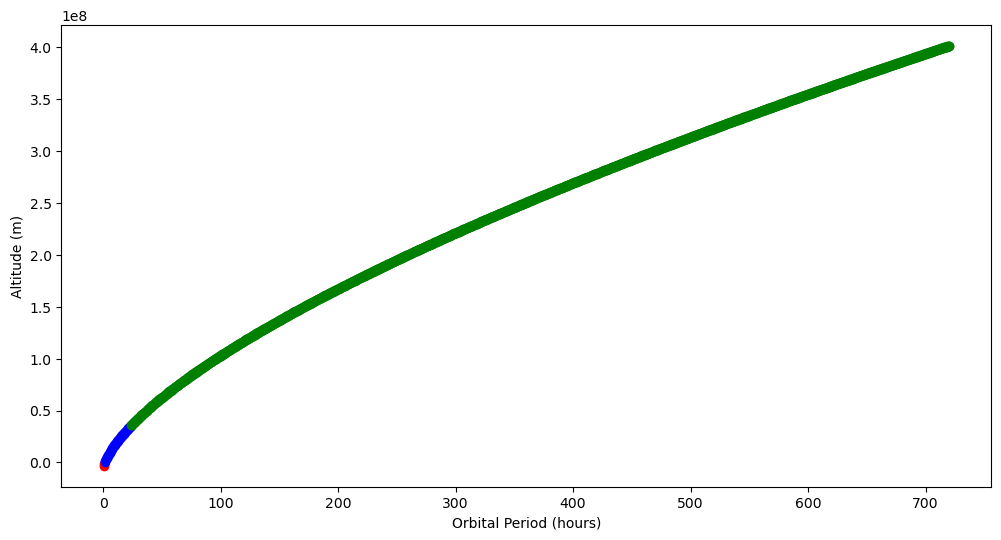

In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt

G = 6.67 * 10**-11  # m^3 kg^−1 s^-2
M = 5.97 * 10**24  # kg
R = 6371 * 1000    # m

def altitude(T):
    h = ((G * M * T**2) / (4 * math.pi**2))**(1/3) - R
    return h

time_h = np.arange(0.5, 30 * 24 + 0.5, 0.5)  # (hours)
time_s = time_h * 3600  # (seconds)

altitudes = [altitude(T) for T in time_s]


plt.figure(figsize=(12, 6))
for t, h in zip(time_h, altitudes):
    if h < 0:
        plt.scatter(t, h, color='red')
    elif t < 24:
        plt.scatter(t, h, color='blue')
    else:
        plt.scatter(t, h, color='green')


plt.xlabel('Orbital Period (hours)')
plt.ylabel('Altitude (m)')
plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [38]:
import math

x = float(input("value of x (in light years):")) 
v = float(input("value of v (as a fraction of the speed of light):"))
c = 3*10**8 # m/s

def gamma(v):
    return 1 / math.sqrt(1 - v**2)

def t_earth(x,v):
    return x /v
    
def t_ship(x,v):
    return t_earth(x,v) / gamma(v)
    

print('-----------------------------------------------------')
print('Observing from Earth it takes', t_earth(x,v), 'years')
print('Observing from the ship it takes', t_ship(x,v), 'years')
    

value of x (in light years):3
value of v (as a fraction of the speed of light):0.3
-----------------------------------------------------
Observing from Earth it takes 10.0 years
Observing from the ship it takes 9.539392014169458 years


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [39]:
import math

x = 10 
v1 = 0.9 #c
v2 = 0.98 #c
v3 = 0.999 #c
c = 3*10**8 # m/s

# v 1 --------------------------
def gamma(v1):
    return 1 / math.sqrt(1 - v1**2)

def t_earth(x,v1):
    return x /v1
    
def t_ship(x,v1):
    return t_earth(x,v1) / gamma(v1)

# v 2 -------------------------
def gamma(v2):
    return 1 / math.sqrt(1 - v2**2)

def t_earth(x,v2):
    return x /v2
    
def t_ship(x,v2):
    return t_earth(x,v2) / gamma(v2)

# v 3 --------------------------
def gamma(v3):
    return 1 / math.sqrt(1 - v3**2)

def t_earth(x,v3):
    return x /v3
    
def t_ship(x,v3):
    return t_earth(x,v3) / gamma(v3)


print('at 0.90𝑐 observing from Earth it takes', t_earth(x,v1), 'years')
print('at 0.90𝑐 bserving from the ship it takes', t_ship(x,v1), 'years')
print('-----------------------------------------------------')
print('at 0.98𝑐 observing from Earth it takes', t_earth(x,v2), 'years')
print('at 0.98𝑐 bserving from the ship it takes', t_ship(x,v2), 'years')
print('-----------------------------------------------------')
print('at 0.999𝑐 observing from Earth it takes', t_earth(x,v3), 'years')
print('at 0.999𝑐 bserving from the ship it takes', t_ship(x,v3), 'years')

at 0.90𝑐 observing from Earth it takes 11.11111111111111 years
at 0.90𝑐 bserving from the ship it takes 4.843221048378525 years
-----------------------------------------------------
at 0.98𝑐 observing from Earth it takes 10.204081632653061 years
at 0.98𝑐 bserving from the ship it takes 2.030586606340043 years
-----------------------------------------------------
at 0.999𝑐 observing from Earth it takes 10.01001001001001 years
at 0.999𝑐 bserving from the ship it takes 0.4475493274496098 years


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [44]:
import math

a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))
c = float(input("Enter the value of c: "))

root1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2 * a)
root2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2 * a)
print("The solutions are:", root1, "and", root2)

Enter the value of a: 0.001
Enter the value of b: 1000
Enter the value of c: 0.001
The solutions are: -9.999894245993346e-07 and -999999.999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [47]:
import math
a = 0.001
b = 1000
c = 0.001

# standard formula
x1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
x2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
print("roots (standard formula):", x1, "and", x2)
        
#alternative formula
x1_alt = (2*c) / (-b + math.sqrt(b**2 - 4*a*c))
x2_alt = (2*c) / (-b - math.sqrt(b**2 - 4*a*c))
print("roots (alternative formula):", x1_alt, "and", x2_alt)



roots (standard formula): -9.999894245993346e-07 and -999999.999999
roots (alternative formula): -1000010.5755125057 and -1.000000000001e-06


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__

In [54]:
import math
a = 0.001
b = 1000
c = 0.001

if b > 0:
    x1 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
else:
    x1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
        
x2 = c / (a * x1)
        
print("roots:", x1, "and", x2)


roots: -999999.999999 and -1.000000000001e-06
